<a href="https://colab.research.google.com/github/tugberksentepe/Optimization-Algorithm-Project/blob/main/GrayWolf_Project_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1, Best Fitness: 0.85
Iteration 2, Best Fitness: 0.8833333333333333
Iteration 3, Best Fitness: 0.8833333333333333
Iteration 4, Best Fitness: 0.8833333333333333
Iteration 5, Best Fitness: 0.8833333333333333
Iteration 6, Best Fitness: 0.8833333333333333
Iteration 7, Best Fitness: 0.8833333333333333
Iteration 8, Best Fitness: 0.8833333333333333
Iteration 9, Best Fitness: 0.8833333333333333
Iteration 10, Best Fitness: 0.8833333333333333
Iteration 11, Best Fitness: 0.8833333333333333
Iteration 12, Best Fitness: 0.8833333333333333
Iteration 13, Best Fitness: 0.8833333333333333
Iteration 14, Best Fitness: 0.8833333333333333
Iteration 15, Best Fitness: 0.8833333333333333
Iteration 16, Best Fitness: 0.8833333333333333
Iteration 17, Best Fitness: 0.9
Iteration 18, Best Fitness: 0.9
Iteration 19, Best Fitness: 0.9
Iteration 20, Best Fitness: 0.9
Iteration 21, Best Fitness: 0.9
Iteration 22, Best Fitness: 0.9
Iteration 23, Best Fitness: 0.9
Iteration 24, Best Fitness: 0.9
Iteration 25, B

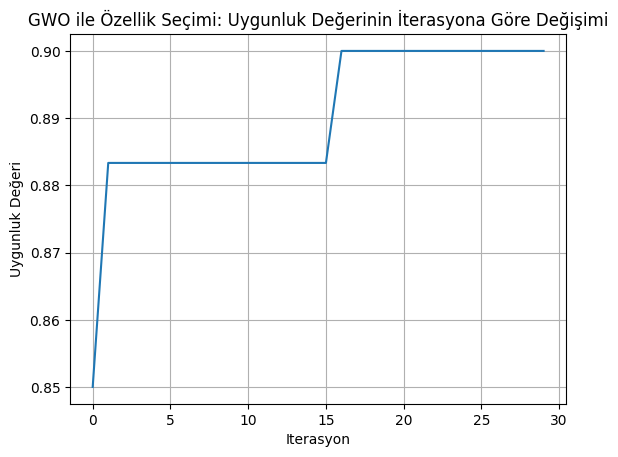

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Adım 1: Veri Setinin Yüklenmesi ve Hazırlanması
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(url, names=column_names)

# Veriyi temizleyelim ( '?' değerlerini NaN ile değiştirip sonra bu satırları çıkaralım)
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Özellikler ve hedef değişkeni ayıralım
X = data.drop('num', axis=1)
y = data['num']
y = y.apply(lambda x: 1 if x > 0 else 0)  # 'num' sütununu binary sınıflandırma için 0 ve 1 olarak değiştiriyoruz

# Eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adım 2: Uygunluk Fonksiyonunun Tanımlanması
def fitness_function(predictions, y_true):
    return accuracy_score(y_true, predictions)

# Adım 3: GWO Algoritmasının Uygulanması
# GWO Parametreleri
num_wolves = 10
num_iterations = 30

# Başlangıç pozisyonlarını rastgele başlat
alpha_position = np.zeros(X_train.shape[1])
beta_position = np.zeros(X_train.shape[1])
delta_position = np.zeros(X_train.shape[1])
alpha_score = float('inf')
beta_score = float('inf')
delta_score = float('inf')

# GWO'nun seçtiği en iyi özellikleri saklamak için değişkenler
best_fitness_values = []

# GWO algoritması
for iteration in range(num_iterations):
    for wolf in range(num_wolves):
        random_values = np.random.rand(X_train.shape[1])
        selected_features = random_values < 0.5  # 0.5 eşik değeri ile özellik seçimi

        if not np.any(selected_features):
            continue  # Hiç özellik seçilmediyse bu kurdu atla

        # Seçilen özelliklerle bir sınıflandırıcı eğit
        rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt')
        rf.fit(X_train.iloc[:, selected_features], y_train)
        predictions = rf.predict(X_test.iloc[:, selected_features])

        # Uygunluk fonksiyonunu hesapla
        fitness = 1 - fitness_function(predictions, y_test)  # Minimizasyon için uygunluk değeri ters çevrilir

        if fitness < alpha_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = alpha_score
            beta_position = alpha_position.copy()
            alpha_score = fitness
            alpha_position = selected_features.copy()
        elif fitness < beta_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = fitness
            beta_position = selected_features.copy()
        elif fitness < delta_score:
            delta_score = fitness
            delta_position = selected_features.copy()

    # Kurtların pozisyonlarını güncelle
    a = 2 - iteration * (2 / num_iterations)
    for wolf in range(num_wolves):
        for feature in range(X_train.shape[1]):
            r1, r2 = np.random.rand(), np.random.rand()
            A1, C1 = 2 * a * r1 - a, 2 * r2
            D_alpha = abs(C1 * alpha_position[feature] - random_values[feature])
            X1 = alpha_position[feature] - A1 * D_alpha

            r1, r2 = np.random.rand(), np.random.rand()
            A2, C2 = 2 * a * r1 - a, 2 * r2
            D_beta = abs(C2 * beta_position[feature] - random_values[feature])
            X2 = beta_position[feature] - A2 * D_beta

            r1, r2 = np.random.rand(), np.random.rand()
            A3, C3 = 2 * a * r1 - a, 2 * r2
            D_delta = abs(C3 * delta_position[feature] - random_values[feature])
            X3 = delta_position[feature] - A3 * D_delta

            random_values[feature] = (X1 + X2 + X3) / 3

    # Her iterasyonda en iyi uygunluk değerinin kaydedilmesi
    best_fitness_values.append(1 - alpha_score)

    print(f"Iteration {iteration + 1}, Best Fitness: {1 - alpha_score}")

# En iyi çözümün değerlendirilmesi
selected_feature_names = X.columns[alpha_position == 1].tolist()  # Seçilen özelliklerin isimleri
print(f"Best Solution Features: {selected_feature_names}")
final_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt')
final_rf.fit(X_train.iloc[:, alpha_position], y_train)
final_predictions = final_rf.predict(X_test.iloc[:, alpha_position])
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy: {final_accuracy}")

# Adım 4: Hiperparametre Optimizasyonu
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, max_features='sqrt'), param_grid=param_grid, cv=5)
grid_search.fit(X_train.iloc[:, alpha_position], y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# En iyi parametrelerle final modelin eğitilmesi
best_rf = grid_search.best_estimator_
best_rf.fit(X_train.iloc[:, alpha_position], y_train)
best_predictions = best_rf.predict(X_test.iloc[:, alpha_position])
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Best Model Accuracy with Hyperparameter Tuning: {best_accuracy}")

# Adım 5: Çapraz Doğrulama ile Model Performansını Değerlendirme
scores = cross_val_score(final_rf, X_train.iloc[:, alpha_position], y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# En iyi uygunluk değerinin nasıl değiştiğini gösteren bir grafik oluşturma
plt.plot(best_fitness_values)
plt.xlabel('Iterasyon')
plt.ylabel('Uygunluk Değeri')
plt.title('GWO ile Özellik Seçimi: Uygunluk Değerinin İterasyona Göre Değişimi')
plt.grid(True)
plt.show()